In [ ]:
import numpy
from CompBioProject import functions
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
address = "2018-07-15T18"
Xtrain = functions.load_obj(address + "/train")
label_train = functions.load_obj(address + "/label_train")
Xtest = functions.load_obj(address + "/test")
label_test = functions.load_obj(address + "/label_test")

# Dimensionality reduction with PCA and TSNE

[60.88026636 52.29774789]
[128.91979179 119.48759423]


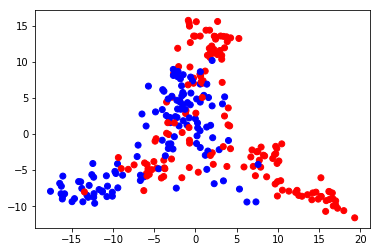

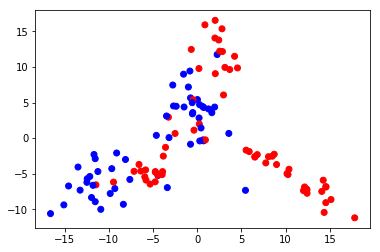

In [4]:
pca_withoutwhitening = PCA(n_components=2)
pca_withoutwhitening.fit(Xtrain.todense())
print(pca_withoutwhitening.explained_variance_)
print(pca_withoutwhitening.singular_values_)
Xtrain_without_whitening = pca_withoutwhitening.transform(Xtrain.todense())
colours = ['red','blue']
plt.scatter(Xtrain_without_whitening[:, 0], Xtrain_without_whitening[:, 1], c=label_train, cmap=matplotlib.colors.ListedColormap(colours))
plt.show()

Xtest_without_whitening = pca_withoutwhitening.transform(Xtest.todense())
colours = ['red','blue']
plt.scatter(Xtest_without_whitening[:, 0], Xtest_without_whitening[:, 1], c=label_test, cmap=matplotlib.colors.ListedColormap(colours))
plt.show()

[60.88026637 52.29774798]
[128.91979181 119.48759433]


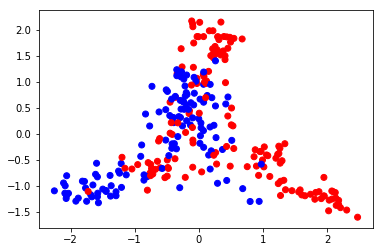

In [5]:
pca_whitening = PCA(n_components=2, whiten=True)
pca_whitening.fit(Xtrain.todense())
print(pca_whitening.explained_variance_)
print(pca_whitening.singular_values_)
Xtrain_with_whitening = pca_whitening.transform(Xtrain.todense())
colours = ['red','blue']
plt.scatter(Xtrain_with_whitening[:, 0], Xtrain_with_whitening[:, 1], c=label_train, cmap=matplotlib.colors.ListedColormap(colours))
plt.show()

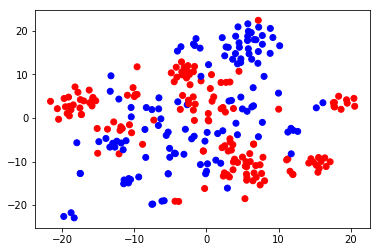

In [26]:
tsne = TSNE()
Xtrain_reduced_tsne = tsne.fit(Xtrain.todense()).embedding_
colours = ['red','blue']
plt.scatter(Xtrain_reduced_tsne[:, 0], Xtrain_reduced_tsne[:, 1], c=label_train, cmap=matplotlib.colors.ListedColormap(colours))
plt.show()

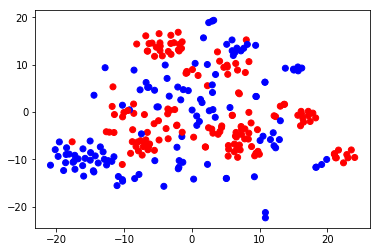

In [25]:
tsne = TSNE(init='pca')
Xtrain_reduced_tsne = tsne.fit(Xtrain.todense()).embedding_
colours = ['red','blue']
plt.scatter(Xtrain_reduced_tsne[:, 0], Xtrain_reduced_tsne[:, 1], c=label_train, cmap=matplotlib.colors.ListedColormap(colours))
plt.show()

# Classification: Logistic Regression

In [30]:
lrg = LogisticRegression(multi_class = "ovr")
lrg.fit(Xtrain_without_whitening,label_train)

print(lrg.coef_)
print(lrg.intercept_)

#confidence scores
print(lrg.decision_function(Xtrain_without_whitening))

#Predict class for train data
print(lrg.predict(Xtrain_without_whitening))

#Score the accuracy
print(lrg.score(Xtrain_without_whitening,label_train,sample_weight=None))
print(lrg.score(Xtest_without_whitening,label_test,sample_weight=None))

#Probabilities
print(lrg.predict_proba(Xtrain_without_whitening))

#Log of probability
print(lrg.predict_log_proba(Xtrain_without_whitening))


[[-0.20032485 -0.02592175]]
[-0.23657426]
[-0.74252658  1.02980084 -2.29963411 -0.06228171  0.39523869 -2.82673503
 -1.99166913  1.04110546  0.47432887  2.38946058  0.01253659  0.46120889
  2.22901189 -2.52374895 -1.19967647 -1.8119103   0.34968902 -1.26867535
 -0.88415228 -1.07072652  0.59291241 -0.00695985  1.26819789  1.363415
 -0.63603343  1.19619065  3.22890444 -2.139382   -1.81057706  1.5213247
  2.93221468 -2.08403176 -1.0347483   2.13830274 -0.39034156 -1.04468118
 -0.88060094 -2.14665072  0.87120899  0.43441882  0.32346506  0.19867556
  2.59615999 -0.0726941  -0.06951735  0.82811051 -0.57728098 -0.16779219
  0.76959134  0.18971636  0.33629488  2.74011176  3.24156967 -2.14013145
 -0.30480186 -0.74779967  2.72120425 -0.09117864  0.02771128  3.48866068
  0.6864724   0.39925585 -0.38583603 -0.07201291  2.52854272 -0.58013584
 -3.29426582  2.46028714  0.07493448 -3.1262142  -0.69921349 -0.09160841
 -1.00664456 -1.29716488  0.02152763  0.35282822  1.84104568  1.04641394
  2.08590872

# Classification: Linear Discriminant Analysis

# Classification: Quadratic Discriminant Analysis

# Classification: Support Vector Machines

# Classification: K-Nearest Neighbors

# Tree-Based Methods

# Regression: Linear Reggression

# Regression: Multiple Linear Regression